# 3、过拟合与欠拟合

+ 线性回归拟合的现象是“欠拟合”，不能很好地表达自变量和因变量之间的关系；
+ 二次多项式回归正正好；
+ 10 次甚至是 100 次多项式，拟合得太好了，把噪音都拟合进去了，这种情况不能够真实地反映自变量和因变量的关系，这种情况称之为“过拟合”。

首先，还是手动生成特征只有 1 个的假数据，自变量与因变量呈二次曲线的关系。

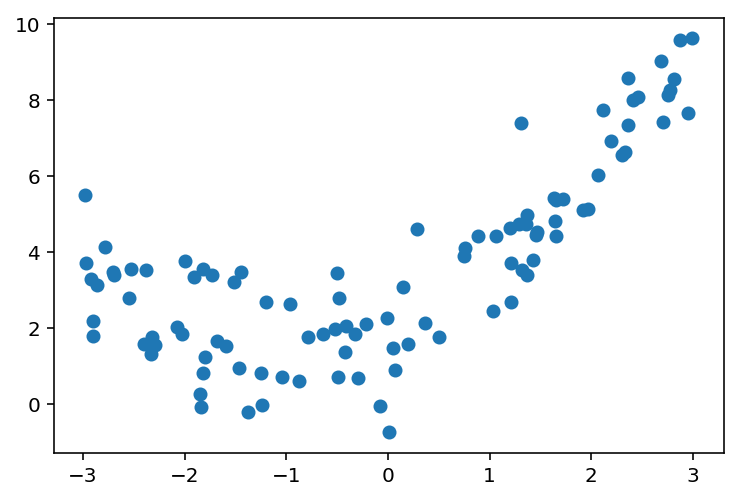

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

## 使用线性回归

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

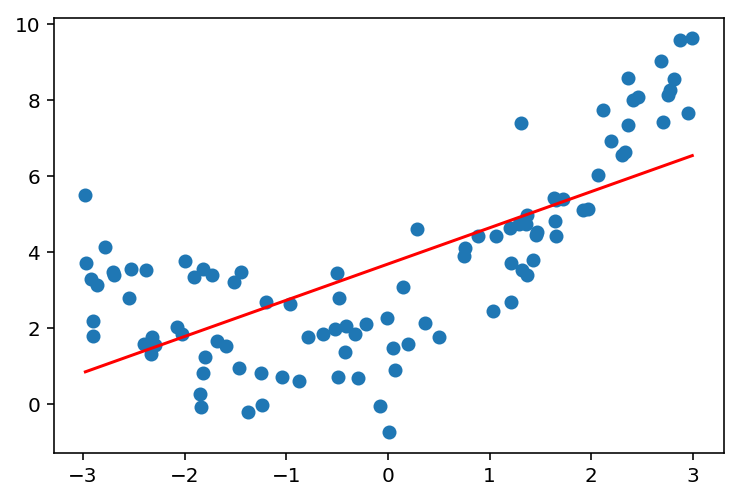

In [10]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

从图像上可以看出拟合效果并不好，所以是欠拟合。

使用线性回归计算均方误差。

In [11]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

## 使用多项式回归

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scale', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [13]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [14]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

可以看出，均方误差在减少。下面我们绘图也可以看到，拟合效果变好了。

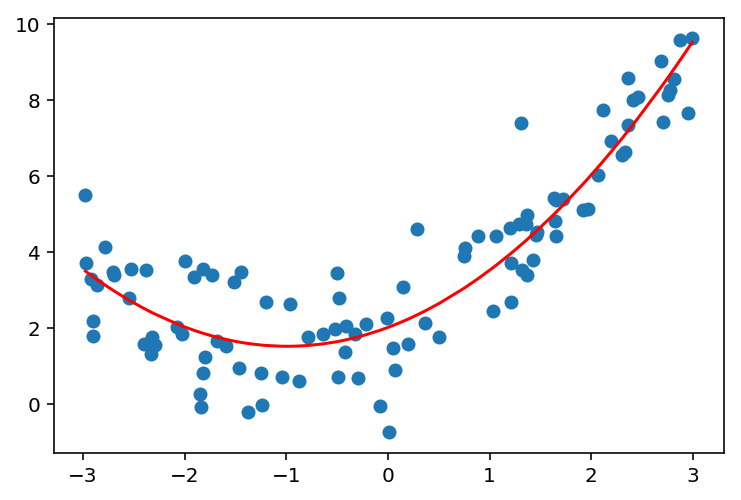

In [15]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='red')
plt.show()

## 使用 10 次多项式特征进行拟合

In [16]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764168

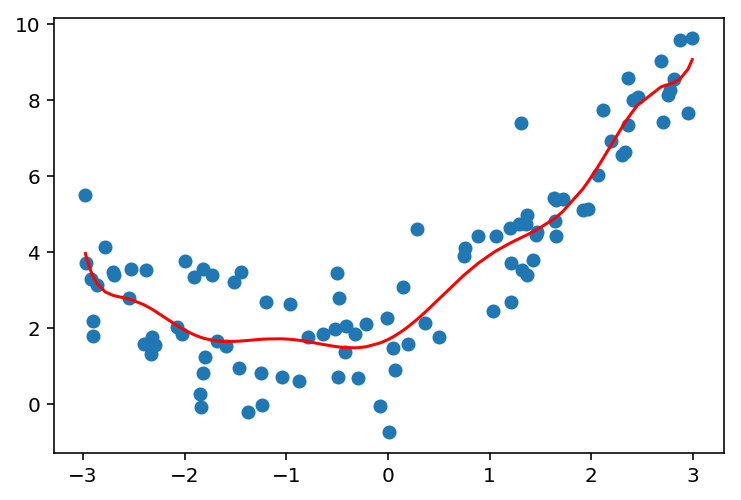

In [17]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='red')
plt.show()

## 使用 100 次多项式特征进行拟合

In [18]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6876013111167566

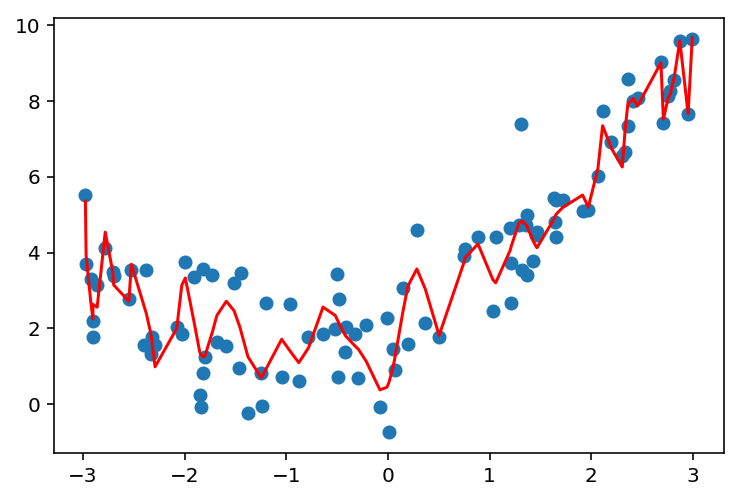

In [19]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='red')
plt.show()

## 下面，我们使用 100 次多项式，画全函数的图像。

In [20]:
X_poly = np.linspace(-3, 3, 100).reshape(100, 1)
y_poly = poly100_reg.predict(X_poly)

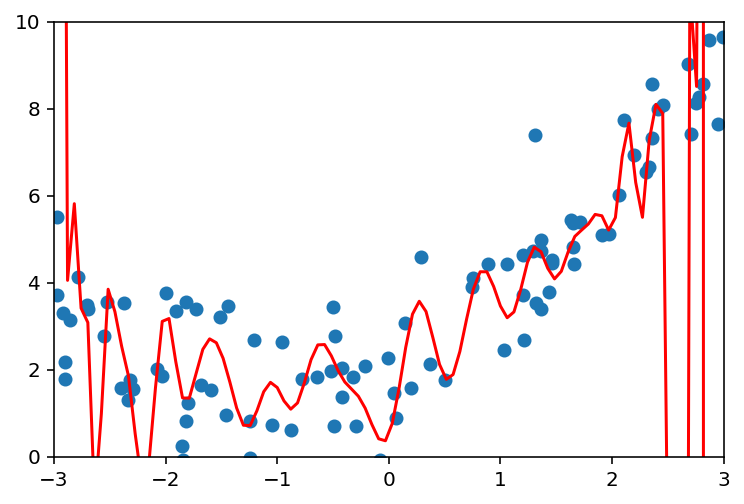

In [21]:
plt.scatter(x, y)
plt.plot(X_poly[:, 0], y_poly, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

## train test split 的意义：划分出测试数据集，以检验模型的泛化能力。特别地，在选择模型超参数的时候，我们还要从训练集中分出一部分数据集，称为验证集，通过交叉验证来得到最佳超参数。

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

#### 使用线性回归拟合的模型，均方误差是 2.2。

In [23]:
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

#### 使用 2 次多项式回归拟合的模型，均方误差是 0.8。

In [24]:
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.8035641056297901

#### 使用 10 次多项式回归拟合的模型，均方误差是 0.92。

In [25]:
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150716

#### 使用 100 次多项式回归拟合的模型，均方误差是 117971955554.10373。

In [26]:
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

14075780347.356796

根据以上的结果，我们知道，次数越高的多项式，虽然在训练数据集上均方误差越来越小，但是在测试数据集上的均方误差大概从 10 次多项式开始就变得越来越多，表示模型的泛化效果越来越差。